# Part II - Prosper Loan Data Visualisation
## by Tobi A

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> This analysis is to help understand factors that determine the Prsoper loan’s outcome status and borrower's rate.


## Dataset Overview

> This is an exploratory data analysis of the loan data from Prosper.
Prosper runs a website where individuals can either invest in personal loans or request to borrow money.

> The Prosper Loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')
prosper.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Prosper Credit Rating

> Two ratings were assigned at the time the listing was created.
The Credit rating for loans originated pre-2009 period and will only be populated for those while the Prosper Rating is for loans originated after July 2009. The two ratings are merged in order to have a wholistic view of Prosper's credit rating


In [3]:
# Combine the ratings of borrowers prior to 2019 and after 2019 using the melt function

creditrating = prosper.melt(id_vars = ['LoanOriginalAmount'], value_vars = ['CreditGrade', 'ProsperRating (Alpha)'],
                            var_name = 'ratingtype', value_name = 'rating').dropna()
creditrating

,LoanOriginalAmount,ratingtype,rating
0,9425,CreditGrade,C
2,3001,CreditGrade,HR
11,1000,CreditGrade,C
17,10000,CreditGrade,AA
21,3000,CreditGrade,D
...,...,...,...
227869,10000,ProsperRating (Alpha),C
227870,2000,ProsperRating (Alpha),A
227871,10000,ProsperRating (Alpha),D
227872,15000,ProsperRating (Alpha),C


In [4]:
# get order of bars by credit rating

x = creditrating['rating'].value_counts().sort_index().index
x

Index(['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC'], dtype='object')

In [5]:
y = creditrating['rating'].value_counts().sort_index(ascending = True)
y

A     17866
AA     8881
B     19970
C     23994
D     19427
E     13084
HR    10443
NC      141
Name: rating, dtype: int64

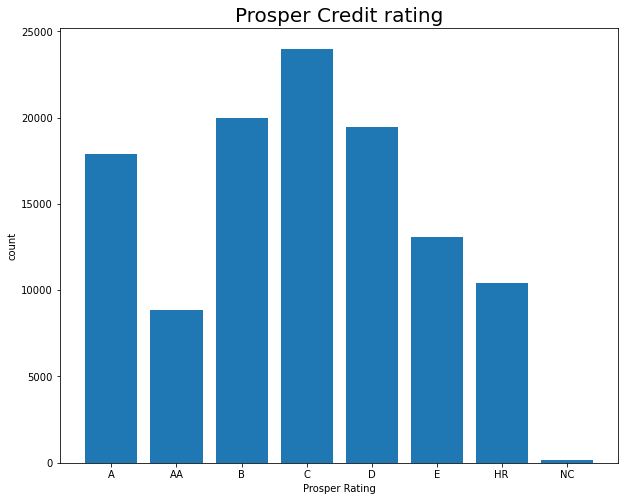

In [6]:
#Prosper Rating Count
plt.figure(figsize =[10,8])
plt.bar(x,y)
plt.xlabel('Prosper Rating') 
plt.ylabel('count')
plt.title('Prosper Credit rating', fontsize = 20);

## Distribution of Income Range
> At a glance, we can see the what the borrowers earn and what range they fall into

In [7]:
inc_order = prosper['IncomeRange'].value_counts().sort_index().index
inc_order

Index(['$0', '$1-24,999', '$100,000+', '$25,000-49,999', '$50,000-74,999',
       '$75,000-99,999', 'Not displayed', 'Not employed'],
      dtype='object')

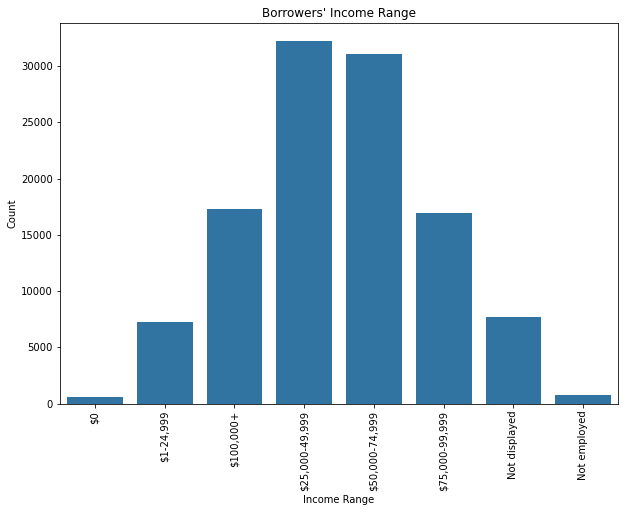

In [8]:
# Borrowers income range
plt.figure(figsize =[10,7])
color = sb.color_palette()[0]
plt.title("Borrowers' Income Range")
sb.countplot(data = prosper, x = 'IncomeRange', color = color, order = inc_order)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation = 90);

## How Income Range Affects Home Ownership

>It is expected that high income enables you achieve financial freedom and so the high income earners should be home owners. 
The plot shows us that a lot of high income earners are actually not home owners as one might expect

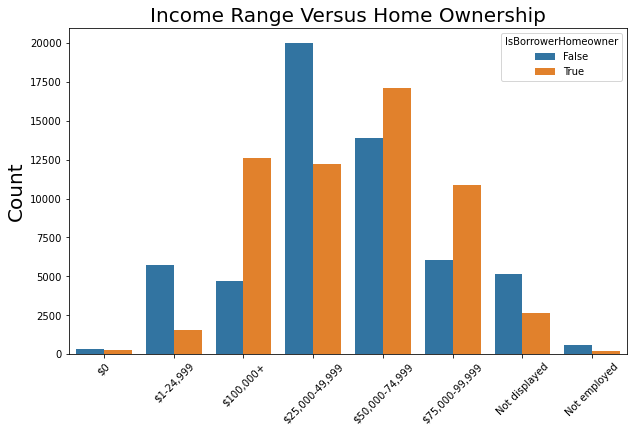

In [9]:
plt.figure(figsize= [10,6])
sb.countplot(data = prosper, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order = inc_order);
plt.title('Income Range Versus Home Ownership', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('', fontsize = 20);
plt.xticks(rotation = 45);


## Borrower's Rate As Affected by Prosper's Rating

>The relationship between the borrower's rate and prosper rating is very strong. Prosper's rating is a very great determinant to the borrower's rate. Borrower's with good credit rates get lower rates while customers with bad credit rates get higher rates as their risk is higher.

In [10]:
# Convert the "rating" column from a plain object type into an ordered categorical type 
grade = ['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC']
sort_grade = pd.api.types.CategoricalDtype(ordered = True, categories = grade)
creditrating['rating'] = creditrating['rating'].astype(sort_grade)

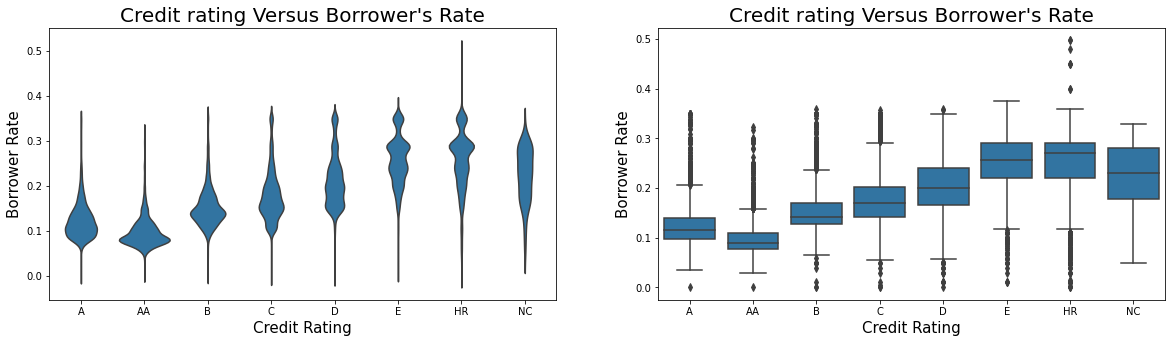

In [11]:
#borrower's rating against borrower's rate 
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
plt.title("Credit rating Versus Borrower's Rate", fontsize = 20)
sb.violinplot(data = prosper, x = creditrating['rating'], y = 'BorrowerRate', color = color, inner = None);
plt.xlabel('Credit Rating', fontsize = 15);
plt.ylabel('Borrower Rate', fontsize = 15);

plt.subplot(1,2,2)
plt.title("Credit rating Versus Borrower's Rate", fontsize = 20) 
sb.boxplot(data = prosper, x= creditrating['rating'], y = 'BorrowerRate', color = color);
plt.xlabel('Credit Rating', fontsize = 15);
plt.ylabel('Borrower Rate', fontsize = 15);

## Relationship Between LoanStatus, Borrower's Rate and Term
The outcome of the loan status is significantly influenced by the borrower's rate and duration of the loan. 
Loans with longer term and high rates have a higher chance of going bad



In [12]:
# Replace Past Due with Defaulted
prosper['LoanStatus'].replace(['Past Due (1-15 days)','Past Due (16-30 days)',
                               'Past Due (31-60 days)', 'Past Due (61-90 days)',
                               'Past Due (91-120 days)', 'Past Due (>120 days)'],
                              'Defaulted', inplace = True)

In [13]:
prosper['LoanStatus'].replace(['Cancelled'], 'Chargedoff', inplace = True)

In [14]:
# Replace FinalPaymentInProgress with Current
prosper['LoanStatus'].replace(['FinalPaymentInProgress'], 'Current', inplace = True)

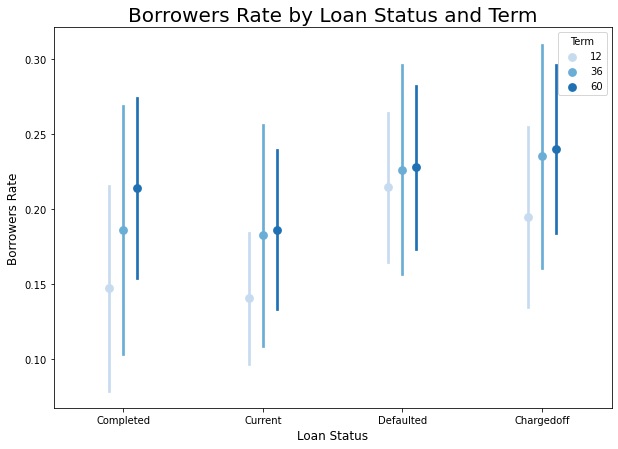

In [15]:
#Compare the relationship between credit rating and rate and home ownership
plt.figure(figsize = [10,7])
sb.pointplot(data = prosper, x = 'LoanStatus', y = 'BorrowerRate', hue = 'Term',
            ci='sd', linestyles = "", palette = 'Blues', dodge = 0.2)
plt.title('Borrowers Rate by Loan Status and Term', fontsize = 20)
plt.ylabel('Borrowers Rate', fontsize = 12);
plt.xlabel('Loan Status', fontsize = 12);

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt